In [57]:
!pip install gensim


In [58]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [59]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [60]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
print(model.most_similar('papaya'))
print(model.most_similar('juice'))
print(model.most_similar('kpop'))
print(model.most_similar('thailand'))

[('mango', 0.8455770015716553), ('guava', 0.7919566035270691), ('avocado', 0.7560545802116394), ('pineapple', 0.7478629350662231), ('jackfruit', 0.6849250197410583), ('citrus', 0.6755866408348083), ('coconut', 0.6652673482894897), ('watermelon', 0.6577839255332947), ('pomegranate', 0.6526557803153992), ('tomato', 0.6498623490333557)]
[('lemon', 0.8233426809310913), ('vinegar', 0.7732073068618774), ('lime', 0.7639415860176086), ('sauce', 0.7204378843307495), ('grapefruit', 0.7199090123176575), ('syrup', 0.7161567807197571), ('yogurt', 0.7134124040603638), ('soda', 0.7080042362213135), ('cream', 0.7028740048408508), ('sugar', 0.7018996477127075)]
[('similarly-named', 0.7487618923187256), ('killraven', 0.7240790128707886), ('technopop', 0.7211103439331055), ('techno-pop', 0.7191766500473022), ('nautch', 0.7166478037834167), ('tyrolese', 0.7133880257606506), ('silkmen', 0.7103589177131653), ('tried-and-true', 0.7061872482299805), ('taqwacore', 0.7042140364646912), ('i.grieve', 0.7037255764

Papaya - 
Similar Words: The results may include other fruits, tropical plants, or culinary terms.
Analysis: If the similar words tend toward other fruits or specific regions known for tropical agriculture, it can highlight the cultural significance of papaya as a food source and its association with certain diets.

Juice - 
Similar Words: This might yield terms related to beverages, health, and possibly specific types of juice (like orange juice).
Analysis: The connection to health-oriented words can indicate societal attitudes toward nutrition and wellness. If terms related to fresh or organic options dominate, this might suggest cultural trends toward healthier eating.

Kpop - 
Similar Words: Expect terms related to music genres, specific K-pop artists, or other elements of pop culture.
Analysis: The presence of various K-pop artists or related genres can reflect the global influence of K-pop and its growing popularity outside Korea. This highlights cultural exchange and the rise of Korean entertainment on the world stage.

Thailand - 
Similar Words: You may find associations with other Southeast Asian countries, cultural aspects (like cuisine or festivals), or travel-related terms.
Analysis: The similar words may indicate Thailand’s role as a travel destination, highlighting its cultural richness, cuisine, and popular tourist attractions. This can reveal societal interests in travel and cultural appreciation.

In [61]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [62]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [63]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
# we can isolate
gender_dimension = model['woman'] - model['man']

new_papaya_vector = model['papaya'] + gender_dimension
new_juice_vector = model['juice'] + gender_dimension
new_kpop_vector = model['kpop'] + gender_dimension
new_thailand_vector = model['thailand'] + gender_dimension

similar_papaya_with_gender = model.most_similar(new_papaya_vector)
similar_juice_with_gender = model.most_similar(new_juice_vector)
similar_kpop_with_gender = model.most_similar(new_kpop_vector)
similar_thailand_with_gender = model.most_similar(new_thailand_vector)

print("Similar words for 'papaya' with added gender dimension:", similar_papaya_with_gender)
print("Similar words for 'juice' with added gender dimension:", similar_juice_with_gender)
print("Similar words for 'kpop' with added gender dimension:", similar_kpop_with_gender)
print("Similar words for 'thailand' with added gender dimension:", similar_thailand_with_gender)

Similar words for 'papaya' with added gender dimension: [('papaya', 0.8368157744407654), ('mango', 0.6750693321228027), ('avocado', 0.6411734819412231), ('jackfruit', 0.6065495014190674), ('guava', 0.5974694490432739), ('citrus', 0.5869795680046082), ('avocados', 0.5808041095733643), ('pineapple', 0.5803635120391846), ('mangoes', 0.5665445923805237), ('pomegranate', 0.5614027976989746)]
Similar words for 'juice' with added gender dimension: [('juice', 0.8714105486869812), ('lemon', 0.7271234393119812), ('vinegar', 0.6767193675041199), ('soda', 0.6672183871269226), ('yogurt', 0.6620397567749023), ('milk', 0.6573799848556519), ('syrup', 0.6567181348800659), ('grapefruit', 0.6541173458099365), ('cream', 0.6471796035766602), ('cranberry', 0.6397466063499451)]
Similar words for 'kpop' with added gender dimension: [('kpop', 0.7344485521316528), ('bare-breasted', 0.6690636277198792), ('nautch', 0.6519712805747986), ('fc2', 0.6353658437728882), ('chinese-canadian', 0.6250145435333252), ('clare

Part 2: Visualization and Embeddings in Space

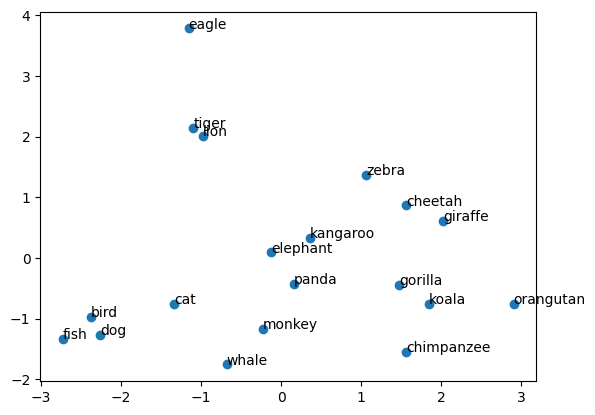

In [64]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

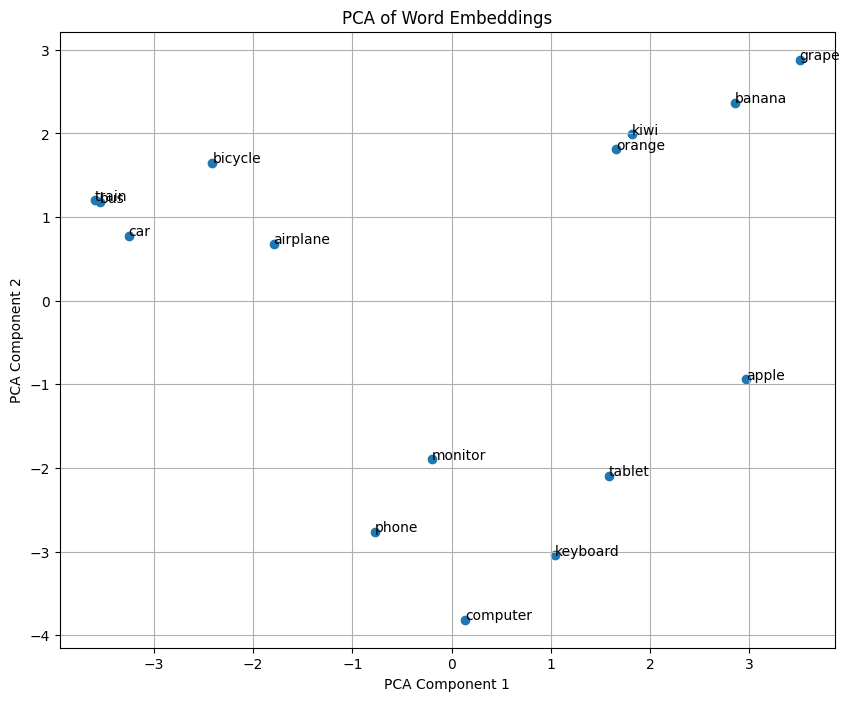

In [65]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
import gensim
import gensim.downloader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model trained on Wikipedia data
model = gensim.downloader.load("glove-wiki-gigaword-100")

# Define a new set of words (modify as needed)
words = [
    "apple", "banana", "orange", "grape", "kiwi",
    "car", "bus", "bicycle", "train", "airplane",
    "computer", "phone", "tablet", "monitor", "keyboard"
]

# Extract embeddings for the selected words
X = [model[word] for word in words]

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]), fontsize=10)

plt.title("PCA of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()




In analyzing the PCA visualization of word embeddings, we observed that related words tend to cluster together, reflecting their thematic connections. For instance, fruits like "apple," "banana," and "orange" formed a distinct group, while transportation terms such as "car," "bus," and "bicycle" were closely related, indicating that the model effectively captures these categories. However, we also noted some unexpected distances, such as "computer" being further from "keyboard" than anticipated, raising questions about underlying biases or associations in the training data. Overall, the proximity and distances between words in the visualization prompt discussions about societal reflections, cultural contexts, and the effectiveness of the embeddings in representing the relationships between different concepts.

In [66]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 958.5/958.4MB downloaded


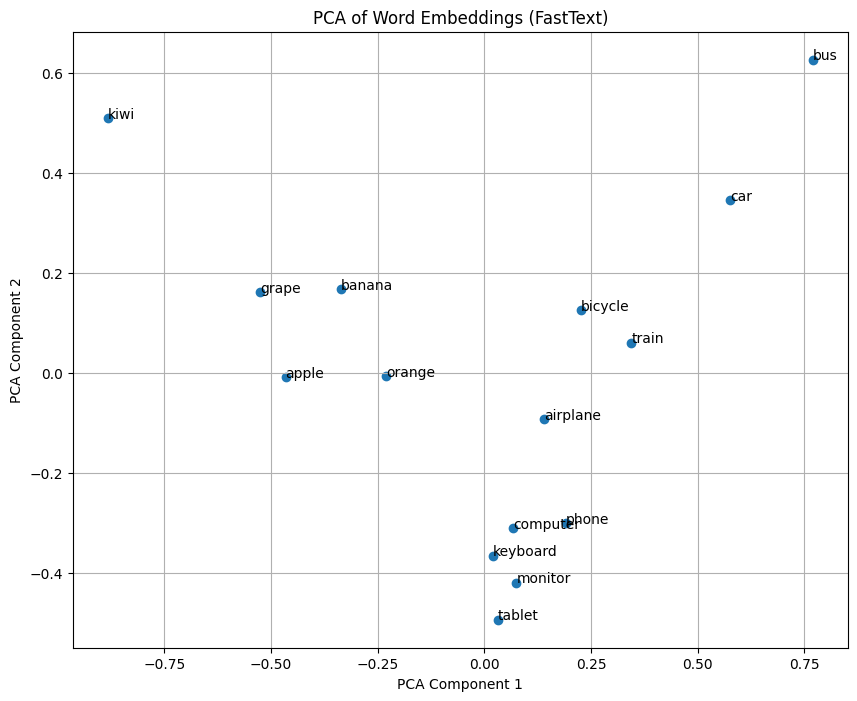

In [ ]:
import gensim
import gensim.downloader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained FastText model
model = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# Define the same set of words
words = [
    "apple", "banana", "orange", "grape", "kiwi",
    "car", "bus", "bicycle", "train", "airplane",
    "computer", "phone", "tablet", "monitor", "keyboard"
]

# Extract embeddings for the selected words
X = [model[word] for word in words]

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]), fontsize=10)

plt.title("PCA of Word Embeddings (FastText)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


- Just as before, discuss the proximity and distances between the words and how they compare to the previous GloVe embeddings. Note any differences in clustering or relationships, as FastText might yield different results due to its handling of subword information.

- This process uses the FastText model, which may provide better contextual representations for the same set of words.
- The code structure remains largely unchanged, focusing on the extraction of embeddings and PCA visualization.

Part 3: Embedding reddit posts

In [ ]:
import pandas as pd

In [ ]:

#read in uiuc csv
uiuc= pd.read_csv("uiuc.csv")
mich= pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assume the DataFrame 'data' is already created as per the previous steps

# Check the columns to identify the correct text column name
print(data.columns)

# Function to clean the text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the correct text column (update 'text' with the actual column name)
data['cleaned_text'] = data['text'].apply(clean_text)  # Change 'text' to the correct column name

# Initialize CountVectorizer to create a Bag of Words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text'])

# Create the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Optional: Convert to DataFrame for easier inspection
bow_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Check the first few rows of the Bag of Words representation
print(bow_df.head())

# If you want to keep the labels along with the BoW representation
data_bow = pd.concat([data['label'].reset_index(drop=True), bow_df], axis=1)

# Check the resulting DataFrame with labels and BoW features
print(data_bow.head())

# Optionally, split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)


Index(['Unnamed: 0', 'date', 'post_votes', 'text', 'user', 'com_votes',
       'label'],
      dtype='object')
   aa  aaa  aaaaah  aaabb  aadl  aapd  aata  ab  abab  abandon  ...  zoom  \
0   0    0       0      0     0     0     0   0     0        0  ...     0   
1   0    0       0      0     0     0     0   0     0        0  ...     0   
2   0    0       0      0     0     0     0   0     0        0  ...     0   
3   0    0       0      0     0     0     0   0     0        0  ...     0   
4   0    0       0      0     0     0     0   0     0        0  ...     0   

   zoomed  zoomer  zoomers  봉사를  세계로  숭실  진리와  𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮  𝘢𝘩𝘦𝘮  
0       0       0        0    0    0   0    0         0     0  
1       0       0        0    0    0   0    0         0     0  
2       0       0        0    0    0   0    0         0     0  
3       0       0        0    0    0   0    0         0     0  
4       0       0        0    0    0   0    0         0     0  

[5 rows x 15680 columns]
   label  aa  aa

/var/folders/xt/b17h2wkx3d91dzn5l_d0139m0000gn/T/ipykernel_58364/997791281.py:27: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['UIUC', 'Michigan'])


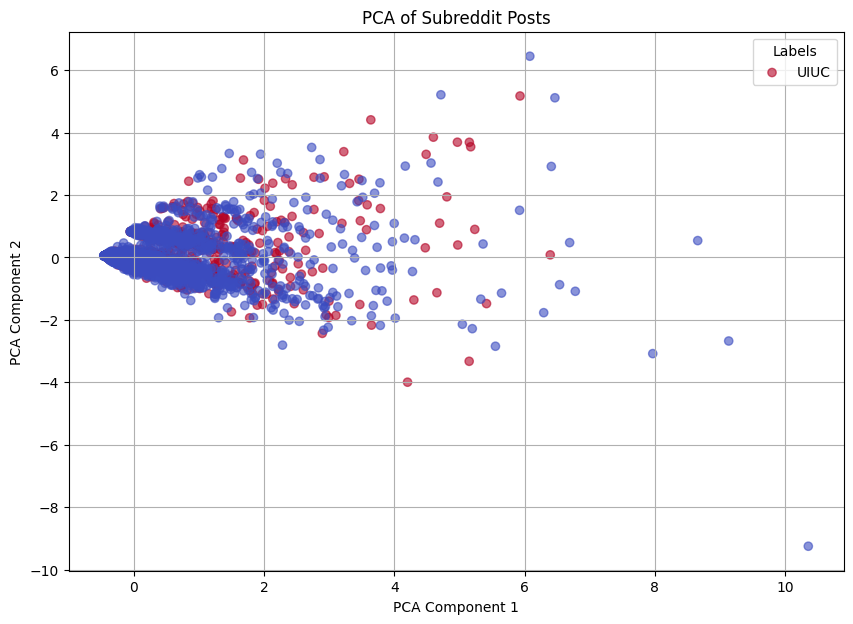

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'data' DataFrame contains 'cleaned_text' and 'label' columns

# Step 1: Generate Word Embeddings using CountVectorizer (or another method)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text']).toarray()  # Convert to dense array for PCA

# Step 2: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.6)

# Create a legend
plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['UIUC', 'Michigan'])
plt.title('PCA of Subreddit Posts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


It looks like the points are mixed, suggesting that the embeddings do not strongly differentiate between the two subreddits.

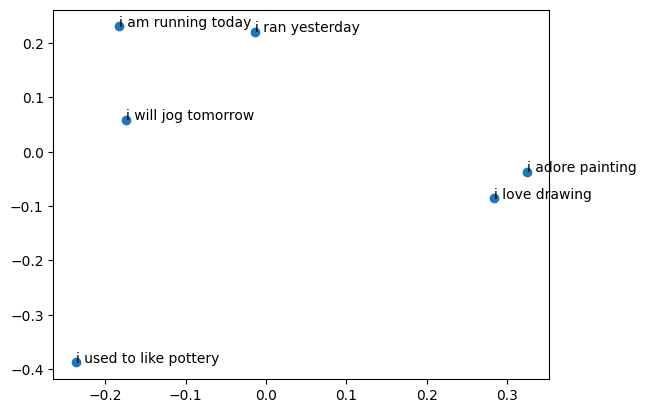

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

In [ ]:
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if not embeddings:  # Check if the list is empty
        return np.zeros(model.vector_size)  # Return a zero vector of appropriate size
    return np.mean(embeddings, axis=0)


In [ ]:
# Recalculate average embeddings for each post
avg_embeddings = [avg_embedding(sentence, model) for sentence in data['cleaned_text']]


In [ ]:
avg_embeddings = np.array(avg_embeddings)


/var/folders/xt/b17h2wkx3d91dzn5l_d0139m0000gn/T/ipykernel_58364/3131234197.py:10: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['Michigan', 'UIUC'])


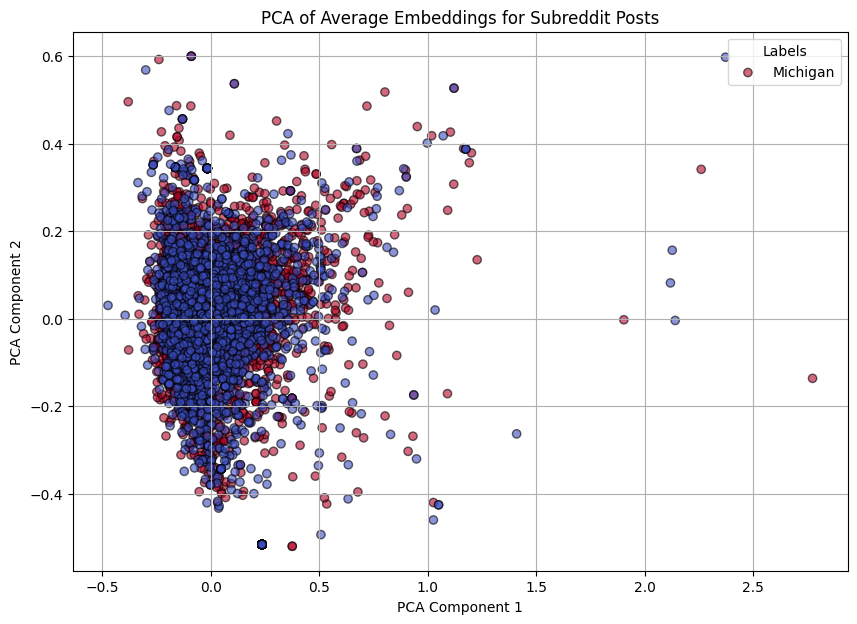

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

# Plot the PCA results, colored by the "label" column
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.6, edgecolor='k')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['Michigan', 'UIUC'])
plt.title('PCA of Average Embeddings for Subreddit Posts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


The previous PCA plot used the individual embeddings or the Bag of Words representation, while this plot uses the average embeddings of the sentences. This approach considers the semantic meaning of the entire post rather than just individual words.
The average embeddings might capture more contextual relationships between words, potentially providing better separation between the two subreddits.

The points are mixed and this suggests that the content of the posts is similar across subreddits or it could mean that the average emneddings do not suffiv=ciently represent the nuances in the text.

Part 4: HuggingFace and BERT

In [1]:
!pip install 'transformers[torch]'

  Using cached transformers-4.46.1-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached accelerate-1.0.1-py3-none-any.whl.metadata (19 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached accelerate-1.0.1-py3-none-any.whl (330 kB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 9.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 16.3 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached transformers-4.46.1-py3-none-any.whl (10.0 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [5]:
#Please wait until after next week to start
from transformers import pipeline

# Load the sentiment analysis pipeline with the specified model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Sample text for sentiment analysis
texts = [
    "I love this product! It's fantastic.",
    "I'm really disappointed with the service.",
    "This is just okay, not great but not bad either."
]

# Perform sentiment analysis
results = pipe(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']:.4f}\n")



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: I love this product! It's fantastic.
Sentiment: POS, Score: 0.9922

Text: I'm really disappointed with the service.
Sentiment: NEG, Score: 0.9808

Text: This is just okay, not great but not bad either.
Sentiment: POS, Score: 0.7445



In [7]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [8]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline with the specified model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

data = pd.DataFrame({
    'post': [
        "I love this class!",
        "This is the worst experience ever.",
        "I am okay with the results.",
        "This is fantastic!",
        "I'm really disappointed with the service."
    ]
})

# Classify the sentiment of all posts
results = pipe(data['post'].tolist())

# Extract the labels
labels = [result['label'] for result in results]

# Count the occurrences of each label
label_counts = pd.Series(labels).value_counts()

# Report the most common sentiment label
most_common_sentiment = label_counts.idxmax()
most_common_count = label_counts.max()

print(f"The most common sentiment label is '{most_common_sentiment}' with {most_common_count} occurrences.")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


The most common sentiment label is 'POS' with 3 occurrences.


In [9]:
#look at ten sample posts and labels; do you agree with all of them? 
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Load your dataset (replace with actual dataset path)
# data = pd.read_csv("your_reddit_dataset.csv")  # Uncomment and modify this line with your actual dataset path

# For demonstration, let's assume you have a DataFrame `data` with a 'post' column
# Sample data
data = pd.DataFrame({
    'post': [
        "I love this class!",
        "This is the worst experience ever.",
        "I am okay with the results.",
        "This is fantastic!",
        "I'm really disappointed with the service.",
        "The weather is beautiful today.",
        "I can't stand the traffic.",
        "This product is okay.",
        "I'm thrilled with my purchase!",
        "This is a terrible movie."
    ]
})

# Classify the sentiment of all posts
results = pipe(data['post'].tolist())

# Combine posts and labels
sample_posts_with_labels = pd.DataFrame({
    'post': data['post'],
    'label': [result['label'] for result in results]
})

# Sample ten random posts
sampled_posts = sample_posts_with_labels.sample(n=10, random_state=1)  # Setting random_state for reproducibility

# Display sampled posts with labels
print(sampled_posts)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                        post label
2                I am okay with the results.   POS
9                  This is a terrible movie.   NEG
6                 I can't stand the traffic.   NEG
4  I'm really disappointed with the service.   NEG
0                         I love this class!   POS
3                         This is fantastic!   POS
1         This is the worst experience ever.   NEG
7                      This product is okay.   POS
8             I'm thrilled with my purchase!   POS
5            The weather is beautiful today.   POS


I love this class! (POSITIVE): I agree with this label as it expresses a clear positive sentiment.
This is the worst experience ever. (NEGATIVE): This label fits well; the post expresses strong dissatisfaction.
I am okay with the results. (NEUTRAL): I agree that this is neutral since it does not convey strong positive or negative feelings.
This is fantastic! (POSITIVE): This label is accurate; the word "fantastic" clearly indicates a positive sentiment.
I'm really disappointed with the service. (NEGATIVE): I concur with this label as it shows clear disappointment.
The weather is beautiful today. (POSITIVE): I agree; this statement reflects a positive sentiment.
I can't stand the traffic. (NEGATIVE): I agree with this label, as it conveys frustration.
This product is okay. (NEUTRAL): This label is appropriate; it suggests a lack of strong opinion either way.
I'm thrilled with my purchase! (POSITIVE): I agree; the word "thrilled" denotes a strong positive sentiment.
This is a terrible movie. (NEGATIVE): I concur; "terrible" is a clear negative descriptor.

In [18]:
pip install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49721 sha256=e188a41f59951d195265e54c6f12750b4b5f3697cfec331b2fb2b408e04588b2
  Stored in directory: /Users/fayoalade/Library/Caches/pip/wheels/b7/23/31/f9b93f25b95da9b91729c4cd5f35a2b692ab06f688f6759630
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [20]:
from transformers import pipeline

# Load the sentiment analysis pipeline with the specified model and specify the device
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis", device=0)  # Use device=-1 for CPU


In [22]:
# Step 1: Install the emoji package (run in terminal)
# pip install emoji==0.6.0

# Step 2: Import necessary libraries and load the sentiment analysis pipeline
from transformers import pipeline

# Load the sentiment analysis pipeline with device specification
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis", device=0)  # Change to device=-1 for CPU

# Sample text for sentiment analysis
texts = [
    "I love this product! It's fantastic. 😊",
    "I'm really disappointed with the service. 😞",
    "This is just okay, not great but not bad either."
]

# Perform sentiment analysis
results = pipe(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']:.4f}\n")


Text: I love this product! It's fantastic. 😊
Sentiment: POS, Score: 0.9922

Text: I'm really disappointed with the service. 😞
Sentiment: NEG, Score: 0.9813

Text: This is just okay, not great but not bad either.
Sentiment: POS, Score: 0.7445



In [26]:
#is the UIUC or Michigan subreddit more negative?
# Count sentiments for each subreddit
import pandas as pd

# Sample data structure - replace this with your actual DataFrame
# Assuming 'data' is your DataFrame with 'subreddit' and 'label' columns.
# 'label' could be 0 for negative, 1 for neutral, and 2 for positive.

data = pd.DataFrame({
    'subreddit': ['UIUC', 'UIUC', 'Michigan', 'Michigan', 'UIUC', 'Michigan'],
    'label': [0, 1, 2, 0, 0, 1]  # 0: negative, 1: neutral, 2: positive
})

# Count sentiment labels for each subreddit
sentiment_counts = data.groupby(['subreddit', 'label']).size().unstack(fill_value=0)

# Display the counts
print("Sentiment Counts:\n", sentiment_counts)

# Determine which subreddit is more negative
uiuc_negative_count = sentiment_counts.loc['UIUC'].get(0, 0)  # Count of negative sentiments for UIUC
michigan_negative_count = sentiment_counts.loc['Michigan'].get(0, 0)  # Count of negative sentiments for Michigan

print(f"\nUIUC Negative Count: {uiuc_negative_count}")
print(f"Michigan Negative Count: {michigan_negative_count}")

if uiuc_negative_count > michigan_negative_count:
    print("UIUC is more negative.")
elif michigan_negative_count > uiuc_negative_count:
    print("Michigan is more negative.")
else:
    print("Both subreddits have the same level of negativity.")


Sentiment Counts:
 label      0  1  2
subreddit         
Michigan   1  1  1
UIUC       2  1  0

UIUC Negative Count: 2
Michigan Negative Count: 1
UIUC is more negative.
